# Seasonality

Seasonality refers to the periodic fluctuations or patterns that occur in a time series data at fixed intervals, typically on a seasonal basis. These patterns are recurring and predictable, and they can be observed across multiple years or other relevant periods.

To calculate seasonality, you can use a method called seasonal decomposition. This method involves decomposing a time series into three components: trend, seasonal, and residual. The trend component represents the long-term growth or decline in the data, while the seasonal component captures the seasonal patterns that occur over shorter periods. The residual component represents the random fluctuations that cannot be attributed to either the trend or the seasonal component.

There are several ways to perform seasonal decomposition, including using statistical models such as the seasonal autoregressive integrated moving average (SARIMA) model, or through a simple moving average technique. Once the seasonal component is identified, it can be used to forecast future seasonal patterns in the data.

There are different ways to calculate seasonality, depending on the method used. Here are a few formulas:

Seasonal index: This method calculates a seasonal index for each period by dividing the actual value by the average value for that period. The formula is:

Seasonal index = Actual value / Average value for period

For example, to calculate the seasonal index for January sales, you would divide the actual sales for January by the average sales for all Januarys.

Ratio-to-moving average: This method calculates the ratio of actual value to a moving average of previous values. The formula is:

Ratio-to-moving average = Actual value / Moving average

The moving average can be a simple moving average or a weighted moving average.

Seasonal differences: This method involves taking the difference between the actual value and the value from the same period in the previous year. The formula is:

Seasonal difference = Actual value - Value from same period in previous year

For example, to calculate the seasonal difference for January sales, you would subtract the sales for January of this year from the sales for January of last year.

In [59]:
import yfinance as yf
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt

In [60]:
# Downloading Google stock data
symbol = 'GOOGL'
start_date = '2016-04-24'
end_date = '2023-04-24'
google = yf.download(symbol, start=start_date, end=end_date, progress=False)
print(google)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-04-25   36.767502   37.243999   36.755001   37.110500   37.110500   
2016-04-26   37.221001   37.279499   36.015999   36.268501   36.268501   
2016-04-27   36.265999   36.357498   35.453999   36.073002   36.073002   
2016-04-28   36.164501   36.463001   35.160000   35.252998   35.252998   
2016-04-29   35.206001   35.605499   35.188999   35.394001   35.394001   
...                ...         ...         ...         ...         ...   
2023-04-17  104.660004  106.160004  104.519997  105.970001  105.970001   
2023-04-18  106.489998  106.540001  104.070000  104.500000  104.500000   
2023-04-19  103.580002  104.980003  103.070000  104.180000  104.180000   
2023-04-20  103.910004  106.250000  103.870003  105.290001  105.290001   
2023-04-21  105.470001  106.000000  104.779999  105.410004  105.410004   

              Volume  
Date          

In [61]:
google_monthly_return = google["Adj Close"].pct_change().groupby(
    [google["Adj Close"].index.year,
    google["Adj Close"].index.month]).mean()
#pct_change = (current - previous) / previous * 100
print(google_monthly_return)

Date  Date
2016  4      -0.011703
      5       0.002727
      6      -0.002751
      7       0.005944
      8      -0.000071
                ...   
2022  12     -0.006269
2023  1       0.005901
      2      -0.004399
      3       0.006345
      4       0.001285
Name: Adj Close, Length: 85, dtype: float64


In [62]:
google_monthly_return_list = []
for month, monthly_return in google_monthly_return.iteritems():
    google_monthly_return_list.append({'month': month[1], 'monthly_return': monthly_return})


In [63]:
print(google_monthly_return_list)

[{'month': 4, 'monthly_return': -0.011702837749585193}, {'month': 5, 'monthly_return': 0.002726820338992001}, {'month': 6, 'monthly_return': -0.002750965017671651}, {'month': 7, 'monthly_return': 0.005943594029776916}, {'month': 8, 'monthly_return': -7.132747566165042e-05}, {'month': 9, 'monthly_return': 0.0008927539008738756}, {'month': 10, 'monthly_return': 0.0003778759302314141}, {'month': 11, 'monthly_return': -0.0019280665634922932}, {'month': 12, 'monthly_return': 0.0010469007699813685}, {'month': 1, 'monthly_return': 0.0017737478092004933}, {'month': 2, 'monthly_return': 0.0015730688892175}, {'month': 3, 'monthly_return': 0.00017224117812321958}, {'month': 4, 'monthly_return': 0.004626545160968381}, {'month': 5, 'monthly_return': 0.0030129039485059365}, {'month': 6, 'monthly_return': -0.0026366865708222927}, {'month': 7, 'monthly_return': 0.0009041648519660828}, {'month': 8, 'monthly_return': 0.00048446988681384644}, {'month': 9, 'monthly_return': 0.0009951562714027085}, {'month

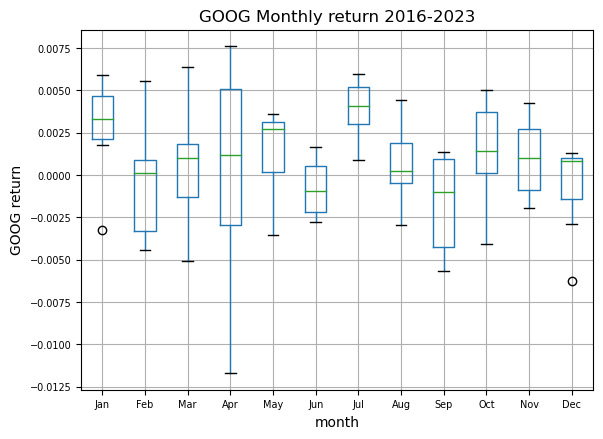

In [64]:
google_monthly_return_list = pd.DataFrame(google_monthly_return_list, columns=('month', 'monthly_return'))
google_monthly_return_list.boxplot(column='monthly_return', by='month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['Jan','Feb','Mar','Apr','May','Jun',\
        'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('GOOG return')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title("GOOG Monthly return 2016-2023")
plt.suptitle("")
plt.show()

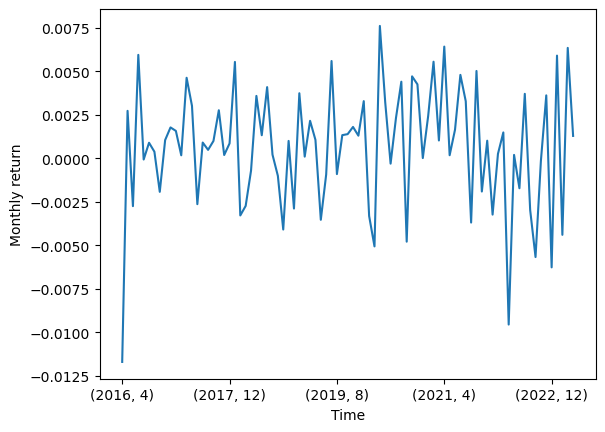

In [65]:
fig = plt.figure()
google['Adj Close'].pct_change().groupby(
    [google['Adj Close'].index.month])
ax1 = fig.add_subplot(111, ylabel='Monthly return')
google_monthly_return.plot()
plt.xlabel('Time')
plt.show()


In [66]:
# Displaying rolling statistics
def plot_rolling_statistics_ts(ts, titletext,ytext, window_size=12):
    ts.plot(color='red', label='Original', lw=0.5)
    ts.rolling(window_size).mean().plot(
            color='blue',label='Rolling Mean')
    ts.rolling(window_size).std().plot(
            color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.ylabel(ytext)
    plt.title(titletext)
    plt.show(block=False)

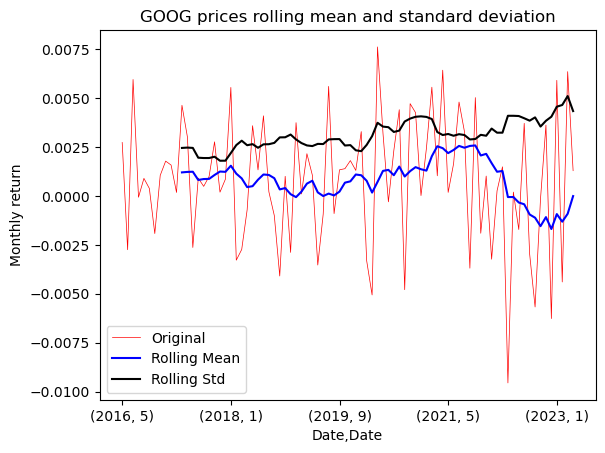

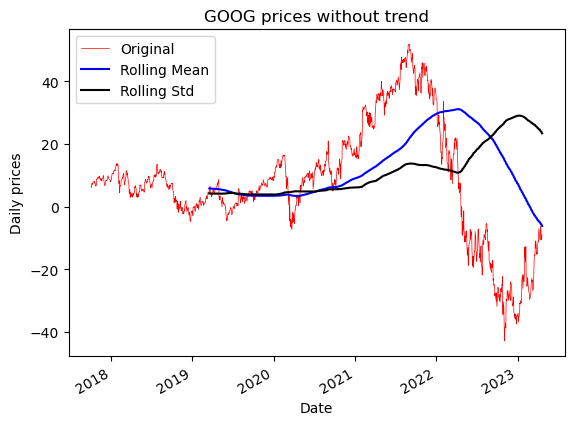

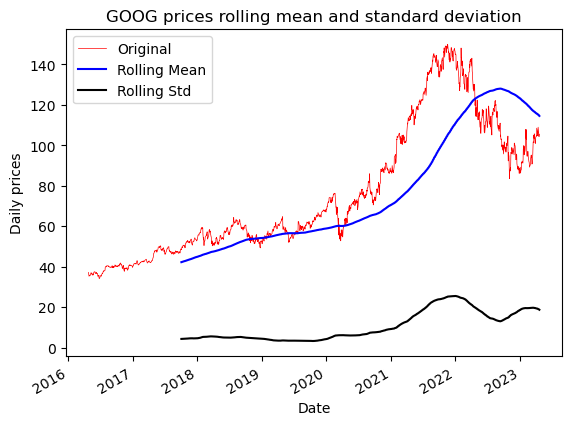

In [70]:
plot_rolling_statistics_ts(google_monthly_return.iloc[1:], 'GOOG prices rolling mean and standard deviation', 'Monthly return')
plot_rolling_statistics_ts(google['Adj Close']-google['Adj Close'].rolling(365).mean(), 'GOOG prices without trend', 'Daily prices', 365)
plot_rolling_statistics_ts(google['Adj Close'],'GOOG prices rolling mean and standard deviation','Daily prices',365)

The test_stationarity function tests for stationarity in a time series data using the Dickey-Fuller test. Stationarity is a desirable property of time series data, as it means that the statistical properties of the data such as mean, variance and autocorrelation are constant over time. Non-stationary data can have trends, seasonality or other forms of dependence on time, which can make it difficult to model and analyze the data.

The Dickey-Fuller test is a commonly used statistical test for checking stationarity in time series data. It tests the null hypothesis that a unit root is present in the data, indicating that the data is non-stationary. If the p-value obtained from the test is below a certain threshold (typically 0.05), then the null hypothesis is rejected and the data is considered stationary.

In the test_stationarity function, we first apply the Dickey-Fuller test to the input time series data using the adfuller function from the statsmodels.tsa.stattools module. We then print out the results of the test, which include the test statistic, p-value, number of lags used in the regression, and the number of observations used. The p-value is the most important output from the test, as it indicates the significance level at which we can reject the null hypothesis of non-stationarity.

In [74]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[1:], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    print (dfoutput)

test_stationarity(google_monthly_return[1:])
test_stationarity(google['Adj Close'])

Results of Dickey-Fuller Test:
Test Statistic                -1.129093e+01
p-value                        1.380461e-20
#Lags Used                     0.000000e+00
Number of Observations Used    8.200000e+01
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -0.978706
p-value                           0.760951
#Lags Used                       23.000000
Number of Observations Used    1736.000000
dtype: float64


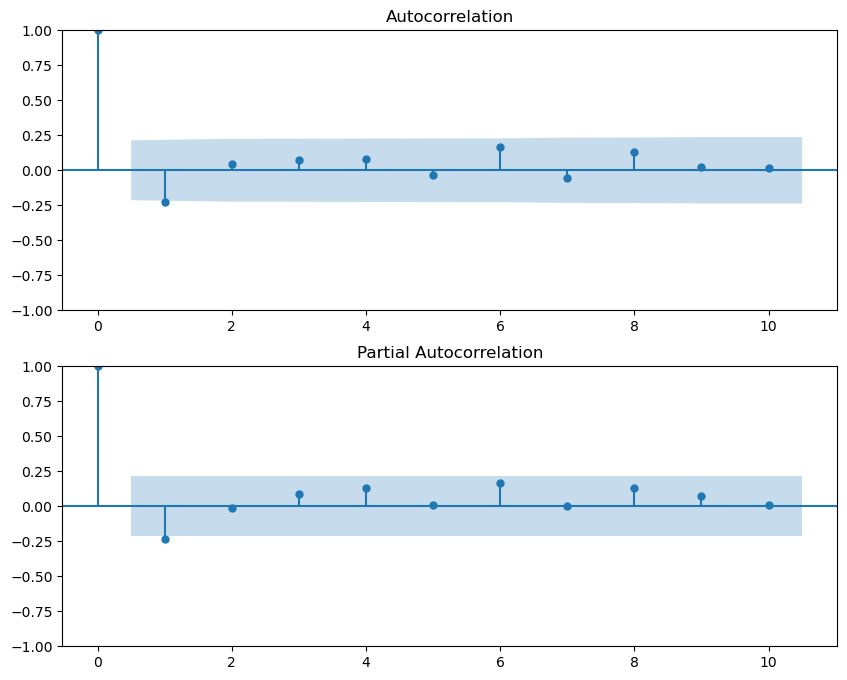

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

fig, axes = pyplot.subplots(2,1, figsize=(10,8))
plot_acf(google_monthly_return[1:], ax=axes[0], lags=10)
plot_pacf(google_monthly_return[1:], ax=axes[1], lags=10)
pyplot.show()


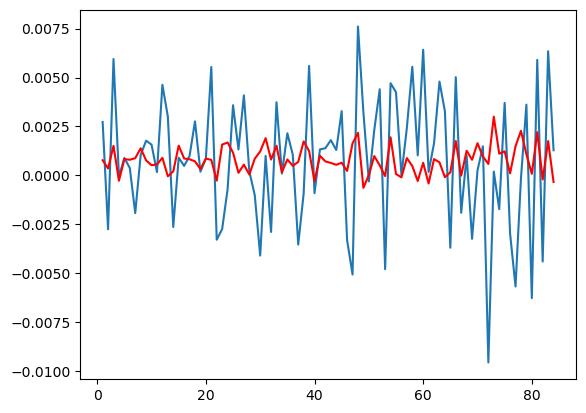

In [81]:
from statsmodels.tsa.arima.model import ARIMA
google_monthly_return.reset_index(drop=True, inplace=True)

model = ARIMA(google_monthly_return[1:], order=(2, 0, 2))
fitted_results = model.fit()
google_monthly_return[1:].plot()
fitted_results.fittedvalues.plot(color='red')
plt.show()
